In [1]:
import pandas as pd 
import numpy as np
import math
import keras
import tensorflow as tf
print(pd.__version__)
import progressbar
import os
from os import listdir

1.2.3


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.21.0

pandas    : 1.2.3
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.1
matplotlib: 3.3.4
h5py      : 2.10.0

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.8.0-48-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Sat Mar 27 2021 10:21:24CET



## Load of the data

   You can also load all of them! Writing "all_data"

In [12]:
from process import loaddata
class_data = loaddata("../data/{}.csv".format('probability'))

In [17]:
np.random.shuffle(class_data)
y = class_data[:,0]
x = class_data[:,1:13]

In [18]:
x.shape

(4790000, 12)

In [19]:
class_data[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 3592500 
Valuation sample: 1197500


In [21]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [22]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers
from keras.layers.normalization import BatchNormalization

In [23]:
def build_model() :
    model = models.Sequential()
    model.add (BatchNormalization(input_dim = 12))
    model.add (layers.Dense (16 , activation = "relu" , input_dim = 12))
    model.add (layers.Dense (16, activation = "relu"))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "mse" , metrics =["mae"])
    return model

In [24]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 100, batch_size = 10000 , validation_data = (x_val, y_val) )
model.save("../models/classifier/{}_nodropout.h5".format('probability'))

Epoch 1/100
360/360 [==============================] - 2s 5ms/step - loss: 0.1059 - mae: 0.2677 - val_loss: 0.0022 - val_mae: 0.0272
Epoch 2/100
360/360 [==============================] - 1s 4ms/step - loss: 0.0019 - mae: 0.0222 - val_loss: 0.0014 - val_mae: 0.0154
Epoch 3/100
360/360 [==============================] - 1s 4ms/step - loss: 0.0013 - mae: 0.0143 - val_loss: 9.3012e-04 - val_mae: 0.0114
Epoch 4/100
360/360 [==============================] - 1s 4ms/step - loss: 8.3327e-04 - mae: 0.0107 - val_loss: 5.0185e-04 - val_mae: 0.0085
Epoch 5/100
360/360 [==============================] - 1s 4ms/step - loss: 4.4167e-04 - mae: 0.0080 - val_loss: 3.0045e-04 - val_mae: 0.0065
Epoch 6/100
360/360 [==============================] - 1s 4ms/step - loss: 2.8426e-04 - mae: 0.0062 - val_loss: 2.3088e-04 - val_mae: 0.0052
Epoch 7/100
360/360 [==============================] - 1s 4ms/step - loss: 2.2717e-04 - mae: 0.0050 - val_loss: 1.9202e-04 - val_mae: 0.0044
Epoch 8/100
360/360 [============

Epoch 59/100
360/360 [==============================] - 3s 9ms/step - loss: 6.3443e-05 - mae: 0.0012 - val_loss: 6.2532e-05 - val_mae: 0.0012
Epoch 60/100
360/360 [==============================] - 1s 4ms/step - loss: 6.3559e-05 - mae: 0.0012 - val_loss: 6.2080e-05 - val_mae: 0.0011
Epoch 61/100
360/360 [==============================] - 2s 4ms/step - loss: 6.2725e-05 - mae: 0.0012 - val_loss: 6.1457e-05 - val_mae: 0.0012
Epoch 62/100
360/360 [==============================] - 1s 4ms/step - loss: 6.2379e-05 - mae: 0.0012 - val_loss: 6.1717e-05 - val_mae: 0.0011
Epoch 63/100
360/360 [==============================] - 4s 11ms/step - loss: 6.1383e-05 - mae: 0.0012 - val_loss: 6.0587e-05 - val_mae: 0.0012
Epoch 64/100
360/360 [==============================] - 3s 8ms/step - loss: 6.1377e-05 - mae: 0.0012 - val_loss: 6.0558e-05 - val_mae: 0.0011
Epoch 65/100
360/360 [==============================] - 1s 4ms/step - loss: 6.0997e-05 - mae: 0.0011 - val_loss: 6.0642e-05 - val_mae: 0.0011
Epoch

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 12)                48        
_________________________________________________________________
dense_3 (Dense)              (None, 16)                208       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 545
Trainable params: 521
Non-trainable params: 24
_________________________________________________________________


## Adding Dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Geoff Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Let’s say a
given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5. At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

##### [From Deep Learning with Python, Chollet]

<ipython-input-27-ea34e6e63f4a>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


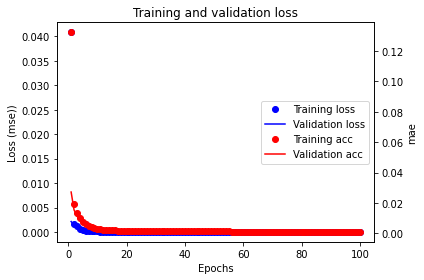

In [27]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['mae']
val_accuracy = history.history['val_mae']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss (mse))')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training acc')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation acc')
ax2.set_ylabel('mae')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
fig.savefig("acc+loss_drop.pdf")
fig.show()

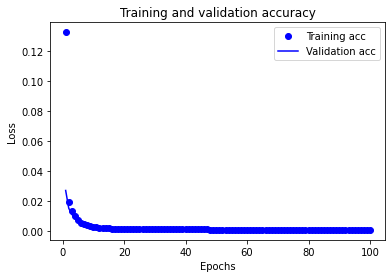

In [28]:
plt.clf()   # clear figure

accuracy = history.history['mae']
val_accuracy = history.history['val_mae']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Probability density distribution

In [33]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
y_pred = model.predict(x)

In [35]:
y_pred

array([[3.673896e-05],
       [3.673896e-05],
       [3.673896e-05],
       ...,
       [3.673896e-05],
       [3.673896e-05],
       [3.673896e-05]], dtype=float32)